In [5]:
import dotenv
dotenv.load_dotenv()

True

In [6]:
import os

In [7]:
ALPHA_VANTAGE_API_KEY = os.getenv('ALPHA_VANTAGE_API_KEY')

In [8]:
from alpha_vantage.timeseries import TimeSeries
timeseries = TimeSeries(
    key=ALPHA_VANTAGE_API_KEY, 
    output_format='pandas', 
    indexing_type='date'
)

In [9]:
df, meta = timeseries.get_intraday(
    symbol="NVDA",
    interval="1min", 
    outputsize="full",
    month="2024-05",
    # extended_hours="false",
)
df

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2024-05-28 19:59:00,1149.725,1150.00,1149.50,1149.99,14887.0
2024-05-28 19:58:00,1149.280,1149.95,1149.14,1149.56,8103.0
2024-05-28 19:57:00,1149.270,1149.46,1148.85,1149.27,6864.0
2024-05-28 19:56:00,1149.740,1149.74,1148.73,1149.20,9278.0
2024-05-28 19:55:00,1149.720,1149.96,1149.46,1149.74,2868.0
...,...,...,...,...,...
2024-05-01 04:04:00,848.180,848.91,848.00,848.72,957.0
2024-05-01 04:03:00,848.000,848.49,847.00,848.00,1224.0
2024-05-01 04:02:00,846.900,848.28,846.50,847.70,1333.0


<Axes: xlabel='date'>

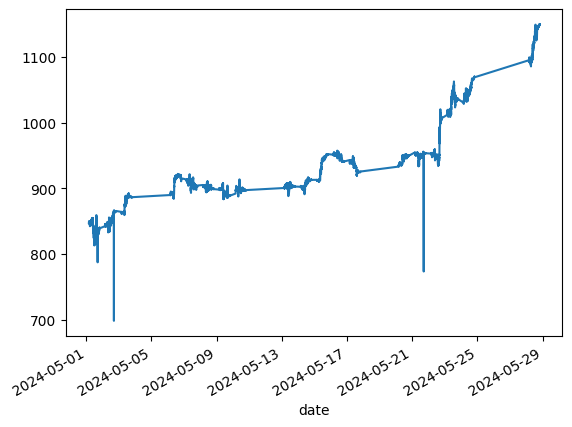

In [10]:
df["4. close"].plot()

<Axes: xlabel='date'>

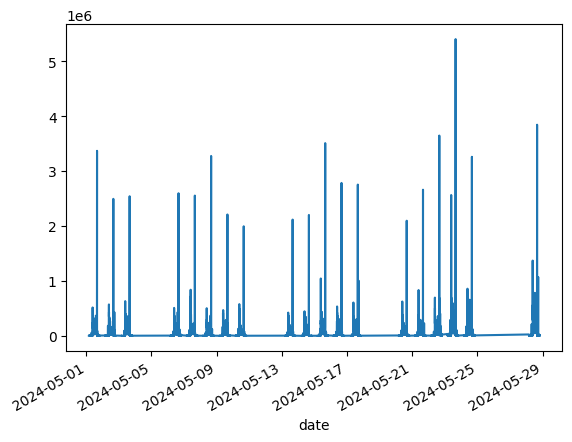

In [11]:
df["5. volume"].plot()

In [12]:
meta

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'NVDA',
 '3. Last Refreshed': '2024-05-28 19:59:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [13]:
from alpha_vantage.fundamentaldata import FundamentalData
fundamentals = FundamentalData(
    key=ALPHA_VANTAGE_API_KEY, 
    output_format='pandas',
    indexing_type='integer',
)

In [14]:
overview, _ = fundamentals.get_company_overview(symbol="NVDA")
overview

,Symbol,AssetType,Name,Description,CIK,Exchange,Currency,Country,Sector,Industry,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
None,NVDA,Common Stock,NVIDIA Corporation,Nvidia Corporation is an American multinationa...,1045810,NASDAQ,USD,USA,MANUFACTURING,SEMICONDUCTORS & RELATED DEVICES,...,36.19,61.96,1.749,1149.39,373.48,897.9,629.03,2459830000,2024-06-28,2024-06-11


In [15]:
income_statement_q, _ = fundamentals.get_income_statement_quarterly(symbol="NVDA")
income_statement_q 

,index,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,...,depreciation,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome
index,,,,,,,,,,,,,,,,,,,,,
0,0,2024-01-28,USD,16791000000,22103000000,5312000000,5312000000,13614000000,712000000,2465000000,...,None,143000000,14106000000,1821000000,63000000,12285000000,12400000000,14169000000,14312000000,12285000000
1,1,2023-10-29,USD,13400000000,18120000000,4720000000,208000000,10417000000,689000000,2294000000,...,None,144000000,10523000000,1280000000,63000000,9242000000,9206000000,10586000000,10730000000,9243000000
2,2,2023-07-30,USD,9462000000,13507000000,4045000000,343000000,6800000000,622000000,2040000000,...,None,146000000,6981000000,793000000,65000000,6188000000,6187000000,7046000000,7192000000,6188000000
3,3,2023-04-30,USD,4648000000,7192000000,2544000000,2544000000,2140000000,633000000,1875000000,...,None,181000000,2209000000,166000000,66000000,2043000000,2036000000,2275000000,2456000000,2043000000
4,4,2023-01-29,USD,3833000000,6051000000,2218000000,2218000000,1256000000,625000000,1952000000,...,None,556000000,1288000000,-126000000,64000000,1414000000,1494000000,1352000000,1908000000,1414000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,58,2009-07-26,USD,156723000,776520000,619797000,619797000,-110107000,73975000,192855000,...,None,49322000,-107101000,-1799000,None,None,-101563000,-110107000,-60785000,-105302000
59,59,2009-04-26,USD,189696000,664231000,474535000,474535000,-230965000,118864000,301797000,...,None,50658000,-224821000,-23483000,None,None,None,-230965000,-180307000,-201338000
60,60,2009-01-25,USD,141666000,481140000,339474000,339474000,-175083000,86440000,211779000,...,None,48055000,-170375000,-22710000,None,None,None,-175083000,-127028000,-147665000


In [16]:
cash_flow, _ = fundamentals.get_cash_flow_quarterly(symbol="NVDA")
cash_flow

,index,fiscalDateEnding,reportedCurrency,operatingCashflow,paymentsForOperatingActivities,proceedsFromOperatingActivities,changeInOperatingLiabilities,changeInOperatingAssets,depreciationDepletionAndAmortization,capitalExpenditures,...,dividendPayoutCommonStock,dividendPayoutPreferredStock,proceedsFromIssuanceOfCommonStock,proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet,proceedsFromIssuanceOfPreferredStock,proceedsFromRepurchaseOfEquity,proceedsFromSaleOfTreasuryStock,changeInCashAndCashEquivalents,changeInExchangeRate,netIncome
index,,,,,,,,,,,,,,,,,,,,,
0,0,2024-01-28,USD,11499000000,338000000,None,587000000,3378000000,387000000,254000000,...,99000000,None,None,None,None,-2256000000,None,None,None,12285000000
1,1,2023-10-29,USD,7332000000,65000000,None,433000000,1444000000,372000000,278000000,...,98000000,None,0,0,0,-3807000000,None,None,None,9243000000
2,2,2023-07-30,USD,6348000000,74000000,None,909000000,3069000000,365000000,289000000,...,99000000,None,0,0,0,0,None,803000000,None,6188000000
3,3,2023-04-30,USD,2911000000,61000000,None,116000000,-99000000,384000000,248000000,...,99000000,None,0,0,0,0,None,1690000000,None,2043000000
4,4,2023-01-29,USD,2248000000,304000000,None,-43000000,-164000000,426000000,509000000,...,98000000,None,None,None,None,-1213000000,None,None,None,1414000000
5,5,2022-10-30,USD,392000000,43000000,None,-875000000,-94000000,406000000,530000000,...,100000000,None,None,None,None,-3485000000,None,None,None,680000000
6,6,2022-07-31,USD,1270000000,46000000,None,294000000,898000000,378000000,433000000,...,100000000,None,0,0,0,-3345000000,None,None,None,656000000
7,7,2022-05-01,USD,1731000000,45000000,None,325000000,2609000000,334000000,361000000,...,100000000,None,None,None,None,-1996000000,None,1897000000,None,1618000000
8,8,2022-01-30,USD,3033000000,286000000,None,33000000,1224000000,309000000,273000000,...,100000000,None,None,None,None,-622000000,None,702000000,None,3003000000


Analytics

In [17]:
import requests

In [18]:
AV_BASE_URL = "https://alphavantageapi.co"

In [19]:
analytics_url = f'{AV_BASE_URL}/timeseries/analytics?SYMBOLS=NVDA,MSFT&RANGE=2024-05-01&RANGE=2024-06-01&INTERVAL=DAILY&OHLC=close&CALCULATIONS=MEAN,STDDEV,CUMULATIVE_RETURN&apikey={ALPHA_VANTAGE_API_KEY}'
analytics_data = requests.get(analytics_url)
analytics_json = analytics_data.json()
analytics_json

{'meta_data': {'symbols': 'NVDA,MSFT',
  'min_dt': '2024-05-01',
  'max_dt': '2024-05-28',
  'ohlc': 'Close',
  'interval': 'DAILY'},
 'payload': {'RETURNS_CALCULATIONS': {'MEAN': {'NVDA': 0.018122812057079735,
    'MSFT': 0.004912725757830028},
   'STDDEV': {'NVDA': 0.02921723108814557, 'MSFT': 0.008518494503650423},
   'CUMULATIVE_RETURN': {'NVDA': 0.3716236557844921,
    'MSFT': 0.09151474768854295}}}}

In [20]:
analytics_sliding_url = f'{AV_BASE_URL}/timeseries/running_analytics?SYMBOLS=NVDA,MSFT&RANGE=1month&INTERVAL=DAILY&WINDOW_SIZE=10&OHLC=close&CALCULATIONS=MEAN&apikey={ALPHA_VANTAGE_API_KEY}'
analytics_sliding_data = requests.get(analytics_sliding_url)
analytics_sliding_json = analytics_sliding_data.json()
analytics_sliding_json

{'meta_data': {'symbols': 'MSFT,NVDA',
  'window_size': 10,
  'min_dt': '2024-04-29',
  'max_dt': '2024-05-28',
  'ohlc': 'Close',
  'interval': 'DAILY'},
 'payload': {'RETURNS_CALCULATIONS': {'MEAN': {'RUNNING_MEAN': {'MSFT': {'2024-05-13': 0.0029241899987912713,
      '2024-05-14': 0.006822577483335535,
      '2024-05-15': 0.007126887272188453,
      '2024-05-16': 0.005898602112167672,
      '2024-05-17': 0.0034963529052373875,
      '2024-05-20': 0.0030253400539616117,
      '2024-05-21': 0.0049108535970458275,
      '2024-05-22': 0.004962654943675859,
      '2024-05-23': 0.00371146374625001,
      '2024-05-24': 0.0038645878062329884,
      '2024-05-28': 0.004147720482062645},
     'NVDA': {'2024-05-13': 0.0032806418616855293,
      '2024-05-14': 0.005883318264056203,
      '2024-05-15': 0.01335705664213227,
      '2024-05-16': 0.009727751127364593,
      '2024-05-17': 0.004272177079064266,
      '2024-05-20': 0.0029861933569045097,
      '2024-05-21': 0.0053468624360826665,
      '

In [22]:
inflation_url = f'{AV_BASE_URL}/query?function=INFLATION&format=csv&&apikey={ALPHA_VANTAGE_API_KEY}'
inflation_data = requests.get(inflation_url)
inflation_json = inflation_data.json()
inflation_json

{'message': 'Forbidden'}